In [2]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.dtypes # データの型を表示
train_df.info() # データの詳細を表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 要素の頻度
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
# 学習データにおける生存率（1:生存, 0:故人）
train_df["Survived"].mean() 

0.3838383838383838

学習データ全体の平均の生存率が0.383838であることが分かった。この数値を参考にして、様々な特徴量ごとの生存率を出し、その特徴量の生存率の高さや低さを考察する。

In [6]:
# Pclass別の生存率
train_df["Survived"].groupby(train_df["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclassの1,2は生存率が0.38より高く,3は0.38よりも低いことが分かる。
Pclassは生存率推測に必要な特徴量であると推測される。

<AxesSubplot:xlabel='Pclass', ylabel='count'>

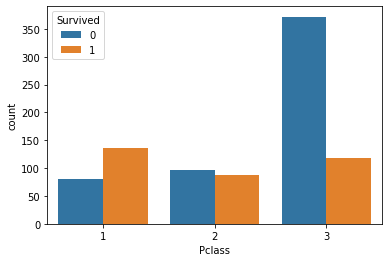

In [7]:
# Pclass別の生存数カウント
import seaborn as sns
sns.countplot(train_df["Pclass"], hue=train_df["Survived"])

In [674]:
# Sex別の生存率
train_df["Survived"].groupby(train_df["Sex"]).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

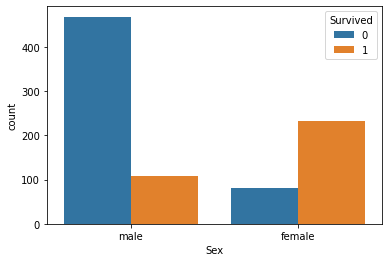

In [675]:
# Sex別の生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Sex"], hue=train_df["Survived"])

男性の生存率が0.38よりも大幅に低く逆に、女性の生存率が0.38よりも大幅に高いことが分かる。
男か女かという情報は生存率と強い関係性があると思われる。

In [676]:
# Ageの抽出
Age0 = train_df[ train_df["Survived"]==0 ]["Age"]
Age1 = train_df[ train_df["Survived"]==1 ]["Age"]

Text(0.5, 0, 'Age')

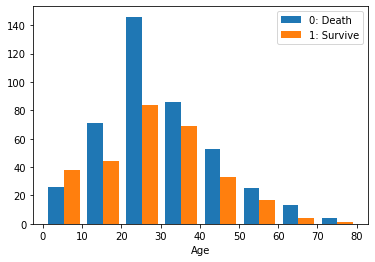

In [677]:
import matplotlib.pyplot as plt
# ヒストグラム
plt.hist( [Age0, Age1], bins=8, label=["0: Death", "1: Survive"] )
plt.legend()
plt.xlabel("Age")

グラフから、30代の生存率が比較的低く、70,80代の生存率も低いことが分かる。これは高齢者は体力的な関係から生き残りづらく、30代の救助に取り組んでいた男性の死亡率が高かったのではないかと推測される。一方で10代の生存率が比較的高いことも読み取れる。子供は優先的に救助されていたと推測される。つまり、年齢は生存率推測には必要な特徴量である可能性が高い。

### Fareの調査

In [678]:
# Fareの抽出
Fare0 = train_df[ train_df["Survived"]==0 ]["Fare"]
Fare1 = train_df[ train_df["Survived"]==1 ]["Fare"]

Text(0.5, 0, 'Fare')

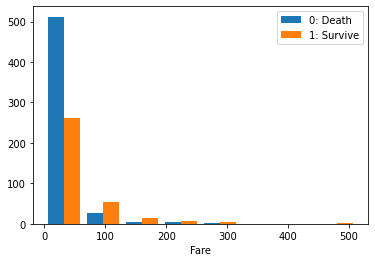

In [679]:
# ヒストグラム
plt.hist( [Fare0, Fare1], bins=8, label=["0: Death", "1: Survive"] )
plt.legend()
plt.xlabel("Fare")

全体的にFareが小さい乗客が大半である。グラフの左側に集中している.第14回目の講義で習ったように、Fareの値にlogをとって学習モデルとする。また、運賃が低い乗客の方が生存率が低いことが分かるためFareは生存率と関係性が高いと考えられる。

Text(0.5, 0, 'Fare')

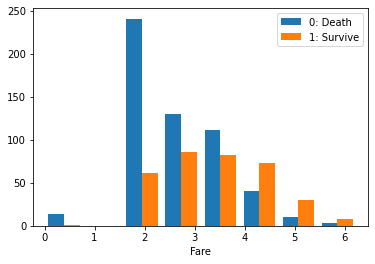

In [680]:
plt.hist( [np.log1p(Fare0), np.log1p(Fare1)], bins=8, label=["0: Death", "1: Survive"] )
plt.legend()
plt.xlabel("Fare")

In [681]:
train_df["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [682]:
# 要素毎のデータ数
train_df["Ticket"].value_counts()

347082        7
1601          7
CA. 2343      7
3101295       6
CA 2144       6
             ..
383121        1
230434        1
C.A. 24580    1
226875        1
382651        1
Name: Ticket, Length: 681, dtype: int64

In [683]:
# 先頭の1文字を抽出
train_df["Ticket"] = train_df["Ticket"].str[0]

In [684]:
# Ticket別の生存率
train_df["Survived"].groupby(train_df["Ticket"]).mean()

Ticket
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Ticket', ylabel='count'>

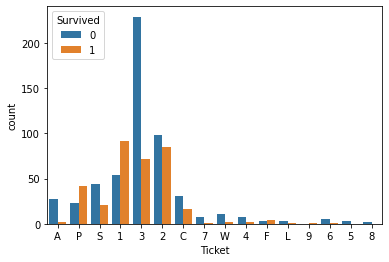

In [685]:
# Ticketの生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Ticket"], hue=train_df["Survived"])

In [686]:
# データの置換（頻度が少ない要素の統合）
train_df["Ticket"].replace( ["7","W","4","F","L","9","6","5","8"], "X", inplace=True) 

<AxesSubplot:xlabel='Ticket', ylabel='count'>

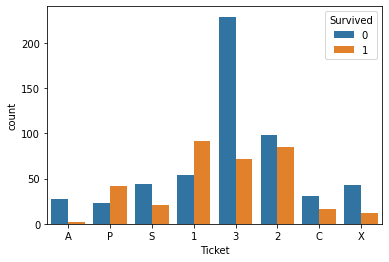

In [687]:
sns.countplot(train_df["Ticket"], hue=train_df["Survived"])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

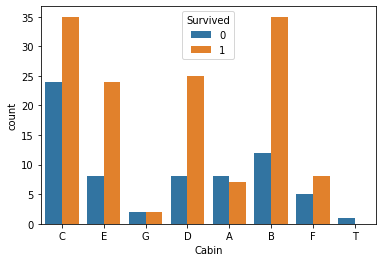

In [701]:
train_df["Cabin"]=train_df["Cabin"].str[0]
sns.countplot(train_df["Cabin"], hue=train_df["Survived"])

In [702]:
train_df["Survived"].groupby(train_df["Cabin"]).mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [690]:
# データの確認
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [691]:
# 文字列の分割
train_df["Name"].str.split( "[, .]", expand=True )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Braund,,Mr,,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,Cumings,,Mrs,,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,Heikkinen,,Miss,,Laina,None,None,None,None,None,None,None,None,None,None,None
3,Futrelle,,Mrs,,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,Allen,,Mr,,William,Henry,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Montvila,,Rev,,Juozas,None,None,None,None,None,None,None,None,None,None,None
887,Graham,,Miss,,Margaret,Edith,None,None,None,None,None,None,None,None,None,None
888,Johnston,,Miss,,Catherine,Helen,"""Carrie""",None,None,None,None,None,None,None,None,None
889,Behr,,Mr,,Karl,Howell,None,None,None,None,None,None,None,None,None,None


In [692]:
# 頻度が少ない要素の統合
tmp = train_df["Name"].str.split( "[, .]", expand=True )
train_df["Name"] = tmp[2]

In [693]:
# 要素毎のデータ数
train_df["Name"].value_counts()

Mr            502
Miss          179
Mrs           121
Master         40
               19
Dr              7
Rev             6
Castellana      2
Col             2
Major           2
Mlle            2
Jonkheer        1
Capt            1
the             1
hoef            1
Mme             1
Don             1
More            1
Manent          1
Ms              1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name', ylabel='count'>

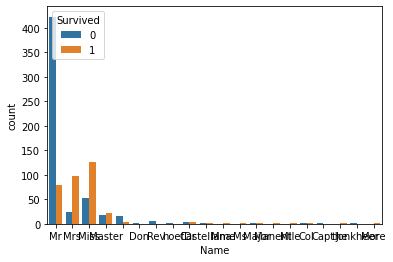

In [694]:
# Nameの生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Name"], hue=train_df["Survived"])

In [695]:
# 頻度が少ない要素の統合 (対象要素が多い場合)
tmp = train_df["Name"].copy()
tmp[ : : ] = "X" # [ : : ]は全ての意
tmp[ train_df["Name"] == "Mr" ] = "Mr"
tmp[ train_df["Name"] == "Miss" ] = "Miss"
tmp[ train_df["Name"] == "Mrs" ] = "Mrs"
train_df["Name"] = tmp

In [696]:
# Name別の生存率
train_df["Survived"].groupby(train_df["Name"]).mean()

Name
Miss    0.703911
Mr      0.157371
Mrs     0.801653
X       0.449438
Name: Survived, dtype: float64

In [697]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [698]:
train_df["Family_Size"]=train_df["SibSp"]+train_df["Parch"]
train_df["Survived"].groupby(train_df["Family_Size"]).mean()
# train_df.info()

Family_Size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

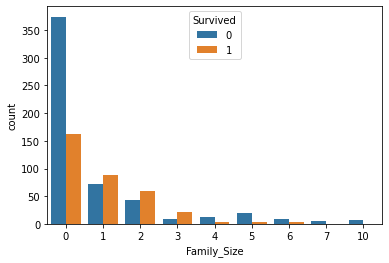

In [699]:
sns.countplot(train_df["Family_Size"], hue=train_df["Survived"])

家族の人数Family_Sizeを新しい特徴量として作った。上のグラフから単身者の生存率がかなり低く、家族の人数が2～3の人たちの生存率が比較的高くなる傾向にある。家族の人数が4人以上になると逆に生存率が低下することが読み取れる。
家族の人数が多すぎると、何らかの不利益が生じる（親が子供を全員助けようとするも人数が多すぎて手に負えなくなり親の生存率が低くなるor子供当たりの助けてくれる親の人数が低いことで子供の生存率が低下する）ような環境であったと推測される。以上よりFamily_Sizeは生存率と強い関係があると考えられる。

## 仕切り直し, 前処理開始

In [754]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [755]:
train_df["is_train"]=1
test_df["is_train"]=0
all_df = pd.concat([train_df.drop(columns=["Survived"]), test_df])
all_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [756]:
# 先頭の1文字を抽出
all_df["Ticket"] = all_df["Ticket"].str[0]
# データの置換（頻度が少ない要素の統合）
all_df["Ticket"].replace( ["7","W","4","F","L","9","6","5","8"], "X", inplace=True) 


In [757]:
all_df["Fare"]

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309, dtype: float64

In [758]:
#分布に歪みのあるFareの値をlogをとって修正する
all_df["Fare"]=np.log1p(all_df["Fare"])
all_df["Fare"]

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: Fare, Length: 1309, dtype: float64

In [759]:
# 先頭の1文字を抽出
all_df["Cabin"] = all_df["Cabin"].str[0] 

In [760]:
# 文字列の分割
tmp = all_df["Name"].str.split( "[, .]", expand=True )
all_df["Name"] = tmp[2]

In [761]:
# 頻度が少ない要素の統合 (対象要素が多い場合)
tmp = all_df["Name"].copy()
tmp[ : : ] = "X"
tmp[ all_df["Name"] == "Mr" ] = "Mr"
tmp[ all_df["Name"] == "Miss" ] = "Miss"
tmp[ all_df["Name"] == "Mrs" ] = "Mrs"
all_df["Name"] = tmp

In [762]:
#新しい特徴量を作る
all_df["Family_Size"]=all_df["SibSp"]+all_df["Parch"]

Family_Sizeでは、単身者（Family_Size=1)の生存率が著しく低く、Family_Size=2～3のグループの生存率が高くなり、それ以降のFamily_Size=>4のグループの生存率が低くなっていたため、Family_Sizeの値を3つのグループに分類することで、学習モデルの次元数を減らし予測精度を上げることが出来ると考えた。下の処理がそれに該当する。

In [763]:
all_df["Family_bin"]=4
all_df.loc[all_df["Family_Size"]==0, "Family_bin"]=0
all_df.loc[(all_df["Family_Size"]>=1) & (all_df["Family_Size"]<=3),"Family_bin"]=1
all_df.loc[(all_df["Family_Size"]>=4) & (all_df["Family_Size"]<=6),"Family_bin"]=2
all_df.drop(["SibSp"], axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  is_train     1309 non-null   int64  
 11  Family_Size  1309 non-null   int64  
 12  Family_bin   1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.2+ KB


In [764]:
# ダミー変数への変換
all_df = pd.get_dummies( all_df, drop_first=True )

In [765]:
# 欠損値の確認
all_df.isna().sum()

PassengerId      0
Pclass           0
Age            263
Parch            0
Fare             1
is_train         0
Family_Size      0
Family_bin       0
Name_Mr          0
Name_Mrs         0
Name_X           0
Sex_male         0
Ticket_2         0
Ticket_3         0
Ticket_A         0
Ticket_C         0
Ticket_P         0
Ticket_S         0
Ticket_X         0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [766]:
# 欠損値を平均値で埋める
all_df["Age"] = all_df["Age"].fillna( all_df["Age"].mean() )
all_df["Fare"] = all_df["Fare"].fillna( all_df["Fare"].mean() )
# all_df["Embarked"] = all_df["Embarked"].fillna(all_df["Embarked"].mean())
# passenger_IDを消す
all_df.drop(["PassengerId"], axis=1, inplace=True)
all_df

,Pclass,Age,Parch,Fare,is_train,Family_Size,Family_bin,Name_Mr,Name_Mrs,Name_X,...,Ticket_X,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,3,22.000000,0,2.110213,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.000000,0,4.280593,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,26.000000,0,2.188856,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.000000,0,3.990834,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,3,35.000000,0,2.202765,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.881138,0,2.202765,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1,39.000000,0,4.699571,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
415,3,38.500000,0,2.110213,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
416,3,29.881138,0,2.202765,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [767]:
#重要度の低い説明変数の削除
# all_df.drop(["Cabin_T"], axis=1, inplace=True)
# all_df.info()

### 最終処理

In [768]:
train_X=all_df[all_df["is_train"]==1].drop(["is_train"], axis=1)
test_X=all_df[all_df["is_train"]==0].drop(["is_train"], axis=1)

In [769]:
train_Y=train_df["Survived"]

## 前処理終了

## 特徴量同士の相関を調べる
特徴量同士が互いに強く相関していなかどうかを調査する。特徴量がお互いに独立であれば、無駄な特徴量がないということになり、良い学習モデルであると言える。下のヒートマップの結果から、Family_SizeとFamily_binの相関が0.94と高いためFamily_sizeを削除した。しかしその結果スコアが0.1ほど下がってしまったためその操作は止めた。ヒートマップを観察すると、SibSpのFamily_Size,Family_binとの相関が0.8以上であるため、不要な特徴量と考え、SibSpを削除した。その結果スコアが0.005ほ上がった。

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

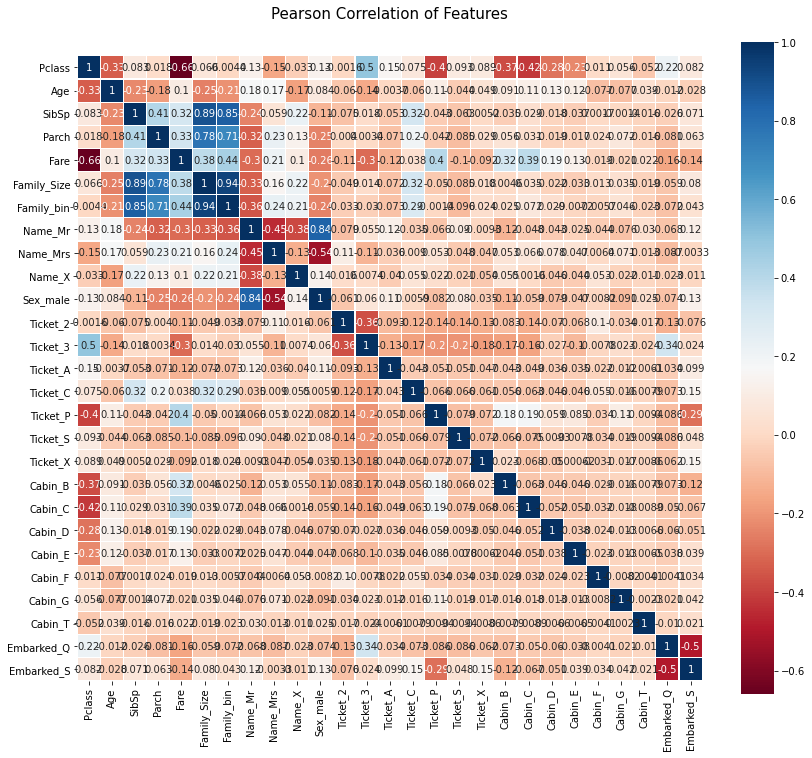

In [542]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## 説明変数の重要度を調べる
下のグラフから、重要度の低い説明変数は、["Cabin_F", "Cabin_T", "Cabin_C", "Ticket_C"]であると推測される。これらの説明変数は、重要度の低いものでありかつ、学習モデルの次元を増やして複雑なものにしている原因と考えられるので削除する。しかし、その結果スコアが0.7679から0.73に下がったため、この操作を止めた。

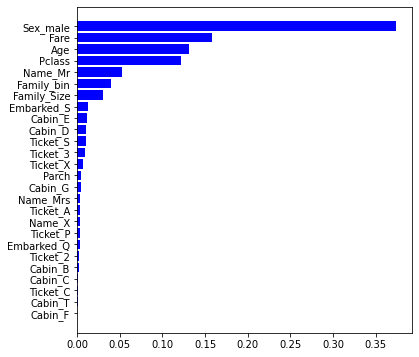

In [598]:
import matplotlib.pyplot as plt
features = train_X.columns
importances = model.feature_importances_

indices = np.argsort(importances)[:30]
plt.figure(figsize=(6,6))
# 横長の棒グラフの作成
plt.barh(range(len(indices)), importances[indices], color='b')
# y軸ラベルの作成
plt.yticks(range(len(indices)), features[indices])
plt.show()

### ランダムフォレスト
スコア:0.75358

In [540]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

MAX_DEPTH=[5, 10, 15, 20, None]
for depth in MAX_DEPTH:
    model = RandomForestClassifier(n_estimators=200, random_state=1000, max_depth=depth)
    score = cross_val_score(model, train_X, train_Y, cv=4)
    valid_score=np.mean(score)
    print(valid_score)



0.8148103260210884
0.8282834403910637
0.8136892497879046
0.8058366662626752
0.8024734375631236


max_depth=10以降改善しないことが分かる

In [ ]:
# 機械学習の利用 (ランダムフォレスト)
from sklearn.ensemble import RandomForestClassifier
# 学習の設定 (木の数, 評価関数, 乱数の種)
model = RandomForestClassifier( n_estimators=200, max_depth=10, random_state=1080 )
# 学習
model.fit( train_X, train_Y )
pred_test_Y=model.predict(test_X)

# 予測結果の出力
file = pd.read_csv("./gender_submission.csv")
file["Survived"] = pred_test_Y.astype(int) # 整数型に変換 (少数点以下を削除)
file.to_csv("./submission_rf.csv", index=False) # indexは上書きしない

### 勾配ブースティング
スコア：0.76794

In [720]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

MAX_DEPTH=[1, 2, 3, 4, 5, None]
for depth in MAX_DEPTH:
    model = GradientBoostingClassifier(n_estimators=200, random_state=55, max_depth=depth)
    scores = cross_val_score(model, train_X, train_Y, cv=4)
    valid_score = np.mean( scores )
    print( valid_score )


0.8148254756999151
0.8249454611562235
0.8451349331394175
0.8294095665171899
0.817032278915687
0.7833949420272291


max_depth=3が最もスコアが高い

In [723]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, random_state=55, max_depth=3)
model.fit(train_X, train_Y)



GradientBoostingClassifier(n_estimators=200, random_state=55)

In [724]:
pred_test_Y = model.predict(test_X)
# 勾配ブースティング予測結果の出力
file = pd.read_csv("./gender_submission.csv")
file["Survived"] = pred_test_Y.astype(int) # 整数型に変換 (少数点以下を削除)
file.to_csv("./submission_GradientBoost.csv", index=False) # indexは上書きしない

## 集団学習
スコア：0.77751

In [745]:
model1 = RandomForestClassifier( n_estimators=200, random_state=99, max_depth = 10)
model2 = RandomForestClassifier( n_estimators=200, random_state=1080, max_depth = 10)
model3 = GradientBoostingClassifier( n_estimators=200, random_state=99, max_depth = 3 )
model4 = GradientBoostingClassifier( n_estimators=200, random_state=1080, max_depth = 3 )

model1.fit( train_X, train_Y )
model2.fit( train_X, train_Y )
model3.fit( train_X, train_Y )
model4.fit( train_X, train_Y ) 

pred_test_Y1 = model1.predict( test_X )
pred_test_Y2 = model2.predict( test_X )
pred_test_Y3 = model3.predict( test_X )
pred_test_Y4 = model4.predict( test_X ) 


# 予測結果の多数決 (平均値)
ensemble_Y = ( pred_test_Y1 + pred_test_Y2
 + pred_test_Y3 + pred_test_Y4) / 4
# 予測結果の出力
file = pd.read_csv("./gender_submission.csv")
file["Survived"] = ensemble_Y.astype(int) # 整数型に変換 (少数点以下を削除)
file.to_csv("./submission_ENS.csv", index=False) # indexは上書きしない



## スタッキング
スコア：0.78229

In [770]:
pred_train_y1 = model1.predict( train_X )
pred_train_y2 = model2.predict( train_X )
pred_train_y3 = model3.predict( train_X )
pred_train_y4 = model4.predict( train_X )

Ens_train_Y = np.array( [pred_train_y1, pred_train_y2, pred_train_y3, pred_train_y4] ).T
print( Ens_train_Y )

[[0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [0 0 0 0]
 [1 1 1 1]
 [0 0 0 0]]


In [771]:
# 重回帰モデル
from sklearn import linear_model
model_boss = linear_model.LinearRegression()
X = Ens_train_Y
Y = train_Y
model_boss.fit( X, Y )

LinearRegression()

In [799]:
# 子分の予測
pred_test_Y1 = model1.predict( test_X )
pred_test_Y2 = model2.predict( test_X )
pred_test_Y3 = model3.predict( test_X )
pred_test_Y4 = model4.predict( test_X )
Ens_test_X = np.array( [pred_test_Y1, pred_test_Y2, pred_test_Y3, pred_test_Y4] ).T
# ボスの予測
pred_test_YBoss = model_boss.predict( Ens_test_X )
pred_test_YBoss

array([0.06959125, 0.06959125, 0.06959125, 0.06959125, 0.97745868,
       0.06959125, 0.08614292, 0.06959125, 0.97745868, 0.06959125,
       0.06959125, 0.06959125, 0.97745868, 0.06959125, 0.97745868,
       0.97745868, 0.06959125, 0.06959125, 0.409435  , 0.63762442,
       0.06959125, 0.63762442, 0.97745868, 0.06959125, 0.97745868,
       0.06959125, 0.97745868, 0.06959125, 0.06959125, 0.06959125,
       0.06959125, 0.06959125, 0.97745868, 0.06959125, 0.06959125,
       0.06959125, 0.06959125, 0.06959125, 0.06959125, 0.06959125,
       0.06959125, 0.97745868, 0.06959125, 0.97745868, 0.97745868,
       0.06959125, 0.06959125, 0.06959125, 0.97745868, 0.97745868,
       0.06959125, 0.06959125, 0.97745868, 0.97745868, 0.06959125,
       0.06959125, 0.06959125, 0.06959125, 0.06959125, 0.97745868,
       0.06959125, 0.06959125, 0.06959125, 0.97745868, 0.63762442,
       0.97745868, 0.97745868, 0.06959125, 0.06959125, 0.97745868,
       0.97745868, 0.06959125, 0.06959125, 0.409435  , 0.97745

In [800]:
# 予測結果の出力
file = pd.read_csv("./gender_submission.csv")
file["Survived"] = (pred_test_YBoss+0.5).astype(int)
file.to_csv("./submission_STK.csv", index=False) # indexは上書きしない

## スコアの推移
- 0.73923(最初)
- 0.74880(Family_sizeの導入)
- 0.75358(Family_sizeの導入, ビニング処理 Family_binの導入, ランダムフォレスト)
- 0.75598(Family_sizeの導入, ビニング処理 Family_binの導入, 勾配ブースティング)
- 0.76315(Family_sizeの導入, 改良版ビニング処理 Family_binの導入, 勾配ブースティング)
- 0.76794(Family_sizeの導入, 改良版ビニング処理 Family_binの導入, 勾配ブースティング, SibSp削除)
- 0.77751(集団学習、ランダムフォレストx2 + 勾配ブースティングx2の平均)
- 0.78229(スタッキング、ランダムフォレストx2 + 勾配ブースティングx2で行う)

## Kaggle最終結果
スコア　0.78229  
順位　4287位  
Masataka Kato  


